### Nome: Emanuel Piveta Pozzobon
#### Turma: GAMA
#### ID: 24039

#### _<center>Ilum - Escola de Ciência. Campinas, SP. 2024</center>_

------------

### 4.10 Fera Formidável - O caixeiro que prefere cidades ímpares

**Objetivo:**  Encontre o caminho de menor distância no problema do caixeiro viajante
que prefere cidades ímpares e mostre ele de forma gráfica

**Considerações do experimento:** Considere um número n ≥ 7 de coordenadas
(x, y) de cidades (cada cidade ocupa uma posição (x, y) diferente). Você pode gerar as
coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O
caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina
seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade
mais de uma vez. Além disso, atribua um número inteiro para cada uma das n cidades que
o caixeiro irá visitar, iniciando a contagem pelo número zero e aumentando esse número
de 1 em 1. O caixeiro deverá necessariamente visitar primeiro as cidades com números
ímpares antes das cidades com números pares. A cidade de número zero deve ser a cidade
inicial.

---

### Introdução:

Pelo enunciado da questão, se torna evidente que para solucionar esse problema é necessário se basear no código realizado em aula do caixeiro viagente para poder solucionar, no entanto, será realizado alterações na função objetivo, na função de seleção e de cruzamento para manter as cidades ímpares vindo antes em ordem sobre as cidades pares criando uma preferência pelas cidades ímpares para o caixero viagente. Além disso, na função de criação de candidatos possíveis, somente será criado candidatos do tipo: ['cidade 00', 'cidades ímpares', 'cidades pares']



----

### Resolução:

Primeiramente, será utilizado os códigos do professor da disciplina do caixero viagente, a fim de construir a resolução do problema.



In [850]:
import random
from pprint import pprint
import matplotlib.pyplot as plt

#### Função para criar um conjunto de cidades:

In [851]:
def cria_cidades(n, xy_minimo=0, xy_maximo=300):
    """Cria um dicionário aleatório de cidades com suas posições (x,y).

    Args:
      n: Número de cidades que serão visitadas pelo caixeiro.
      xy_minimo: Valor mínimo possível das coordenadas x e y.
      xy_maximo: Valor máximo possível das coordenadas x e y.

    """
    cidades = {}
    num_digitos = len(str(abs(n)))

    for i in range(n):
        cidades[f"Cidade {i:0>{num_digitos}}"] = (
            random.randint(xy_minimo, xy_maximo),
            random.randint(xy_minimo, xy_maximo),
        )

    return cidades

In [852]:
teste = cria_cidades(15)
pprint(teste)

{'Cidade 00': (66, 96),
 'Cidade 01': (5, 232),
 'Cidade 02': (196, 42),
 'Cidade 03': (187, 218),
 'Cidade 04': (298, 109),
 'Cidade 05': (160, 264),
 'Cidade 06': (43, 233),
 'Cidade 07': (51, 208),
 'Cidade 08': (65, 73),
 'Cidade 09': (173, 197),
 'Cidade 10': (140, 172),
 'Cidade 11': (47, 91),
 'Cidade 12': (237, 24),
 'Cidade 13': (60, 130),
 'Cidade 14': (280, 228)}


#### Função para plotar todas as cidades:

In [853]:
def plota_cidades(cidades):
    """Plota as cidades do problema do caixeiro viajante

    Nota: código de base criado pelo Google Gemini e modificado aqui.

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    x = [cidades[cidade][0] for cidade in cidades]
    y = [cidades[cidade][1] for cidade in cidades]

    # plotando as cidades
    plt.scatter(x, y, color="blue")

    # nomes das cidades
    for cidade, (x, y) in cidades.items():
        plt.annotate(
            cidade,
            (x, y),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
        )

    plt.xlabel("Coordenada x")
    plt.ylabel("Coordenada y")
    plt.show()


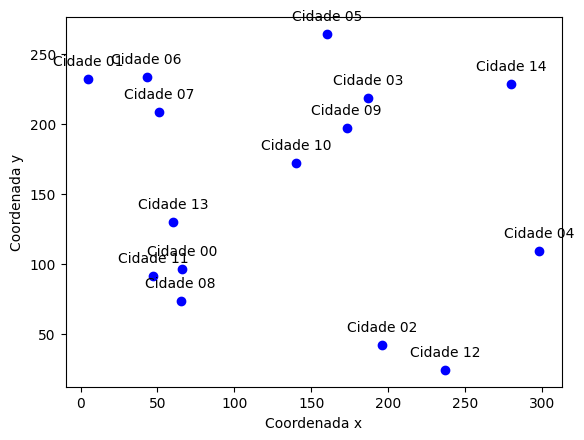

In [854]:
plota_cidades(teste)

#### Função para plotar o trajeto de um candidato em um conjunto de cidades:

In [855]:
def plota_trajeto(cidades, trajeto):
    """Plota o trajeto do caixeiro

    Nota: código de base criado pelo Google Gemini e modificado aqui.

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.
      trajeto: lista contendo a ordem das cidades que foram viszitadas

    """
    x = [cidades[cidade][0] for cidade in cidades]
    y = [cidades[cidade][1] for cidade in cidades]

    # plotando as cidades
    plt.scatter(x, y, color="blue")

    # nomes das cidades
    for cidade, (x, y) in cidades.items():
        plt.annotate(
            cidade,
            (x, y),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
        )

    # plotando os trajetos
    for i in range(len(trajeto) - 1):
        cidade1 = trajeto[i]
        cidade2 = trajeto[i + 1]
        plt.plot(
            [cidades[cidade1][0], cidades[cidade2][0]],
            [cidades[cidade1][1], cidades[cidade2][1]],
            color="red",
        )

    # trajeto de volta à cidade inicial
    cidade1 = trajeto[-1]
    cidade2 = trajeto[0]
    plt.plot(
        [cidades[cidade1][0], cidades[cidade2][0]],
        [cidades[cidade1][1], cidades[cidade2][1]],
        color="red",
    )

    plt.xlabel("Coordenada x")
    plt.ylabel("Coordenada y")
    plt.show()

#### Função para calcular a distância euclidiana:

Isso será importante na função objetivo

In [856]:
def dist_euclidiana(coord1, coord2):
    """Computa a distância Euclidiana entre dois pontos em R^2

    Args:
      coord1: lista contendo as coordenadas x e y de um ponto.
      coord2: lista contendo as coordenadas x e y do outro ponto.

    """
    x1 = coord1[0]
    x2 = coord2[0]
    y1 = coord1[1]
    y2 = coord2[1]

    distancia = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)

    return distancia


#### Função para o caixeiro fazer um caminho aleatório:

Para essa função, será feito alterações de um candidato normal, por exemplo, será obrigado que o candidato inicie na cidade 0, e depois siga somente para cidades ímpares, e depois que ele visitou todas as cidades ímpares, ele seguirá para todas as cidades pares e retornará para cidade 0. Assim, é possível desde o início com a criação dos candidatos já definir que eles comecem aonde queremos. O fato do candidato terminar na cidade 00 fica ímplicito.

Para isso será criado as funções que verifiquem se um número é par ou não e a função para extrair o número de uma string, para que as listas que contém a trajetória de um caixeiro como: ['cidade 01', 'cidade 02' ...] possam ser extraídos esses números como 01, 02, etc. Além disso, será criado uma função para identificar o index do primeiro número par, isso será importante posteriormente para função de cruzamento.

In [857]:
def ispar(number):
    if number % 2 == 0:
        return True
    else:
        return False

In [858]:
def isimpar(number):
    if number % 2 != 0:
        return True
    else:
        return False

In [859]:
def extrai_numero(nome_cidade):
    numero = ''
    for char in nome_cidade:
        if char.isdigit():
            numero += char
    return int(numero)

In [860]:
def index_par_primeiro(lista):
    contador = 0
    index_par_primeiro = 0
    for i in lista[1:]:
        contador+=1
        if ispar(extrai_numero(i)):
            index_par_primeiro = contador
            break
    return index_par_primeiro

In [861]:
def cria_candidato_caixeiro(cidades):
    """Sorteia um caminho possível no problema do caixeiro viajante fazendo ele iniciar em 0, depois seguir 
    para as cidades ímpares e depois para as cidades pares e por fim retorna para 0"

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    # extrai os nomes das cidades em uma lista
    nomes_cidades = list(cidades.keys())
    
    #sempre começa em 0
    caminho = []
    caminho.append(nomes_cidades[0])
    
    nomes_cidades_pares = []
    nomes_cidades_impares = []
    
    # é utilizado nomes_cidades[1::] para pular a cidade 00 que já foi adicionada a lista caminho
    for i in nomes_cidades[1::]:
      if isimpar(extrai_numero(i)):
        nomes_cidades_impares.append(i)
      else:
        nomes_cidades_pares.append(i)
        
    caminho_impares = random.sample(nomes_cidades_impares, k=len(nomes_cidades_impares))
    caminho_pares = random.sample(nomes_cidades_pares, k=len(nomes_cidades_pares))
    
    caminho.extend(caminho_impares)
    caminho.extend(caminho_pares)
    return caminho

Exemplo de funcionamento:

In [862]:
candidato_teste = cria_candidato_caixeiro(teste)
print(candidato_teste)
index_par_primeiro(candidato_teste)

['Cidade 00', 'Cidade 13', 'Cidade 07', 'Cidade 03', 'Cidade 09', 'Cidade 01', 'Cidade 11', 'Cidade 05', 'Cidade 02', 'Cidade 14', 'Cidade 06', 'Cidade 08', 'Cidade 10', 'Cidade 04', 'Cidade 12']


8

Trajeto percorrido pelo candidato:

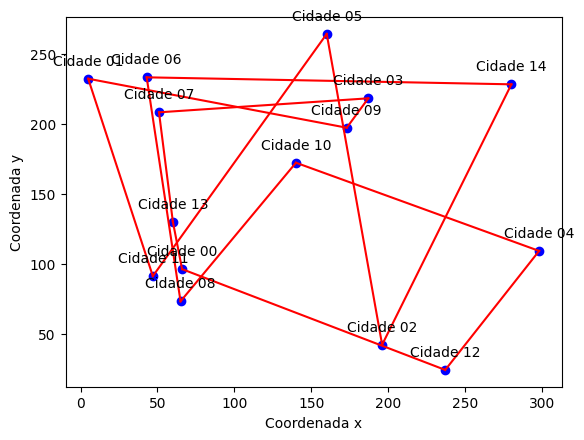

In [863]:
plota_trajeto(teste, candidato_teste)

#### Função para criar uma população de trajetos para o problema do caixeiro:

In [864]:
def populacao_caixeiro(tamanho_populacao, cidades):
    """Cria uma população no problema do caixeiro viajante

    Args:
      tamanho_populacao: tamanho da população.
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    populacao = []

    for _ in range(tamanho_populacao):
        populacao.append(cria_candidato_caixeiro(cidades))

    return populacao

#### Função objetivo para o caixeiro

Será utilizado a mesma função objetivo daquela usada em aula.

In [865]:
def funcao_objetivo_caixeiro(candidato, cidades):
    """Funcao objetivo de um candidato no problema do caixeiro viajante

    Args:
      candidato: uma lista contendo o caminho percorrido
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    distancia = 0

    for pos in range(len(candidato) - 1):
        coord_cidade_partida = cidades[candidato[pos]]
        coord_cidade_chegada = cidades[candidato[pos + 1]]
        distancia += dist_euclidiana(
            coord_cidade_partida, coord_cidade_chegada
        )

    # distância para retornar à cidade inicial
    coord_cidade_final = cidades[candidato[-1]]
    coord_cidade_inicial = cidades[candidato[0]]
    distancia += dist_euclidiana(coord_cidade_final, coord_cidade_inicial)

    return distancia

#### Função objetivo para uma população de caixeiros

In [866]:
def funcao_objetivo_pop_caixeiro(populacao, cidades):
    """Funcao objetivo de uma populacao no problema do caixeiro viajante

    Args:
      populacao: lista contendo os individuos do problema
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    fitness = []

    for individuo in populacao:
        fitness.append(funcao_objetivo_caixeiro(individuo, cidades))

    return fitness

### Função de Seleção:

Será utilizado a função de seleção por torneio de minimização.

In [867]:
def selecao_torneio_min(populacao, fitness, tamanho_torneio):
    """Faz a seleção de uma população usando torneio.

    Nota: da forma que está implementada, só funciona em problemas de
    minimização.

    Args:
      populacao: lista contendo os individuos do problema
      fitness: lista contendo os valores computados da funcao objetivo
      tamanho_torneio: quantidade de invíduos que batalham entre si

    """
    selecionados = []

    for _ in range(len(populacao)):
        sorteados = random.sample(populacao, tamanho_torneio)

        fitness_sorteados = []
        for individuo in sorteados:
            indice_individuo = populacao.index(individuo)
            fitness_sorteados.append(fitness[indice_individuo])

        min_fitness = min(fitness_sorteados)
        indice_min_fitness = fitness_sorteados.index(min_fitness)
        individuo_selecionado = sorteados[indice_min_fitness]

        selecionados.append(individuo_selecionado)

    return selecionados

### Função de cruzamento:


Será feito uma função de cruzamento que promove que os filhos 1 e 2 tenham cidades ímpares no ínicio das listas, enquanto isso promove que cidade pares sejam as últimas. Vai utilizar cruzamento ordenado, só que aplicará duas vezes ao indivíduo tanto na região de números ímpares como na região de número pares. De forma que não se misture em um filho as cidades pares com as cidade ímpares, somado a isso, sempre vai fazer os filhos começarem com a cidade 00.

Para isso será usado a função feita em aula de cruzamento ordenado.

In [868]:
def cruzamento_ordenado(pai, mae):
    """Cruzamento ordenado entre dois individuos

    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento

    """
    tamanho_individuo = len(mae)

    # pontos de corte
    corte1 = random.randint(0, tamanho_individuo - 2)
    corte2 = random.randint(corte1 + 1, tamanho_individuo)

    # filho1
    filho1 = [None] * tamanho_individuo
    filho1[corte1:corte2] = mae[corte1:corte2]
    pai_ = pai[corte2:] + pai[:corte2]
    posicao = corte2 % tamanho_individuo
    for valor in pai_:
        if valor not in filho1:
            filho1[posicao] = valor
            posicao += 1
            posicao %= tamanho_individuo

    # filho2
    filho2 = [None] * tamanho_individuo
    filho2[corte1:corte2] = pai[corte1:corte2]
    mae_ = mae[corte2:] + mae[:corte2]
    posicao = corte2 % tamanho_individuo
    for valor in mae_:
        if valor not in filho2:
            filho2[posicao] = valor
            posicao += 1
            posicao %= tamanho_individuo

    return filho1, filho2

In [869]:
def cruzamento_ordenado_impares_pares(pai, mae, chance_de_cruzamento):
    """Cruzamento ordenado entre dois individuos, garantindo:
       - Cidade 00 no início
       - Cidades ímpares em sequência logo após Cidade 00
       - Cidades pares nas posições finais

    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento
    Returns:
      Dois indivíduos (filho1, filho2) resultantes do cruzamento
    """
    if random.random() < chance_de_cruzamento:
        tamanho_individuo = len(mae)
        
        index_par_primeir = index_par_primeiro(mae)
        
        # Criar os indivíduos
        filho1 = [None] 
        filho2 = [None] 
        filho1[0] = mae[0]
        filho2[0] = pai[0]
        
        pai_set_impar = pai[1:index_par_primeir]
        mae_set_impar = mae[1:index_par_primeir]

        pai_set_par = pai[index_par_primeir:]
        mae_set_par = mae[index_par_primeir:]

        filho1_impar, filho2_impar = cruzamento_ordenado(pai_set_impar, mae_set_impar)
        filho1_par, filho2_par = cruzamento_ordenado(mae_set_par, pai_set_par)     
        
        filho1.extend(filho1_impar)
        filho1.extend(filho1_par)  
        
        filho2.extend(filho2_impar)
        filho2.extend(filho2_par)
        
        return filho1, filho2
    else:
        return pai, mae

In [870]:
pai = cria_candidato_caixeiro(teste)
mae = cria_candidato_caixeiro(teste)
print(f'pai: {pai}')
print(f'mãe: {mae}')
filho1, filho2 = cruzamento_ordenado_impares_pares(pai, mae, 1)
print(f'filho1: {filho1}')
print(f'filho2: {filho2}')


pai: ['Cidade 00', 'Cidade 05', 'Cidade 07', 'Cidade 01', 'Cidade 09', 'Cidade 11', 'Cidade 03', 'Cidade 13', 'Cidade 10', 'Cidade 06', 'Cidade 04', 'Cidade 12', 'Cidade 08', 'Cidade 14', 'Cidade 02']
mãe: ['Cidade 00', 'Cidade 05', 'Cidade 09', 'Cidade 07', 'Cidade 01', 'Cidade 13', 'Cidade 03', 'Cidade 11', 'Cidade 12', 'Cidade 14', 'Cidade 08', 'Cidade 04', 'Cidade 06', 'Cidade 02', 'Cidade 10']
filho1: ['Cidade 00', 'Cidade 05', 'Cidade 07', 'Cidade 01', 'Cidade 09', 'Cidade 13', 'Cidade 03', 'Cidade 11', 'Cidade 10', 'Cidade 14', 'Cidade 08', 'Cidade 04', 'Cidade 06', 'Cidade 02', 'Cidade 12']
filho2: ['Cidade 00', 'Cidade 05', 'Cidade 09', 'Cidade 07', 'Cidade 01', 'Cidade 11', 'Cidade 03', 'Cidade 13', 'Cidade 12', 'Cidade 06', 'Cidade 04', 'Cidade 08', 'Cidade 14', 'Cidade 02', 'Cidade 10']


### Função de mutação:

Vamos criar uma mutação de troca, mas com uma pequena alteração, quando um indivíduo for mutado, ele somente trocará de posição dois indivíduos ímpares ou dois indivíduos somente pares, mantendo inalterado a cidade 00. 

In [871]:
def mutacao_troca(populacao, chance_de_mutacao):
    """Aplica mutacao de troca em um indivíduo, no entanto, essa função troca somente se ambos os genes forem ímpares 
    ou ainda se ambos os genes forem pares. 

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação

    """
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            # é preciso verificar o último indivíduo ímpar:
            ultimo_index_impar = 0
            for i in range(1, len(individuo) - 1):  # ignora cidade 00 inicial
                numero = extrai_numero(individuo[i])
                if isimpar(numero):
                    ultimo_index_impar = i
                else:
                    break
                       
            #sortear um índice que será mutado, não será mutado o indíce 0
            gene1 = random.randint(1, len(individuo) - 1)
            numero1 = extrai_numero(individuo[gene1])
            
            #verificar se esse indíce é par ou ímpar
            if isimpar(numero1):
                gene2 = random.randint(1, ultimo_index_impar)
                while gene2 == gene1:
                    gene2 = random.randint(1, ultimo_index_impar)
            else:
                gene2 = random.randint(ultimo_index_impar + 1, len(individuo) - 1)
                while gene2 == gene1:
                    gene2 = random.randint(ultimo_index_impar + 1, len(individuo) - 1)

            # Realiza a troca
            individuo[gene1], individuo[gene2] = individuo[gene2], individuo[gene1]


### Teste do algoritmo genético:

In [872]:
NUM_CIDADES = 15
CIDADES = cria_cidades(NUM_CIDADES)

TAMANHO_POPULACAO = 50
NUM_GERACOES = 100
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.1
TAMANHO_TORNEIO = 3

In [873]:
CIDADES

{'Cidade 00': (274, 84),
 'Cidade 01': (104, 175),
 'Cidade 02': (10, 235),
 'Cidade 03': (260, 49),
 'Cidade 04': (30, 36),
 'Cidade 05': (211, 71),
 'Cidade 06': (80, 91),
 'Cidade 07': (223, 224),
 'Cidade 08': (65, 216),
 'Cidade 09': (75, 103),
 'Cidade 10': (180, 249),
 'Cidade 11': (145, 181),
 'Cidade 12': (0, 70),
 'Cidade 13': (231, 213),
 'Cidade 14': (71, 74)}

In [874]:
populacao = populacao_caixeiro(TAMANHO_POPULACAO, CIDADES)
# pprint(populacao)
# funcao_objetivo(populacao, CIDADES)
populacao

[['Cidade 00',
  'Cidade 03',
  'Cidade 11',
  'Cidade 01',
  'Cidade 09',
  'Cidade 07',
  'Cidade 13',
  'Cidade 05',
  'Cidade 06',
  'Cidade 02',
  'Cidade 04',
  'Cidade 14',
  'Cidade 12',
  'Cidade 10',
  'Cidade 08'],
 ['Cidade 00',
  'Cidade 07',
  'Cidade 03',
  'Cidade 05',
  'Cidade 01',
  'Cidade 09',
  'Cidade 11',
  'Cidade 13',
  'Cidade 02',
  'Cidade 14',
  'Cidade 10',
  'Cidade 04',
  'Cidade 12',
  'Cidade 06',
  'Cidade 08'],
 ['Cidade 00',
  'Cidade 07',
  'Cidade 01',
  'Cidade 05',
  'Cidade 11',
  'Cidade 03',
  'Cidade 13',
  'Cidade 09',
  'Cidade 08',
  'Cidade 10',
  'Cidade 06',
  'Cidade 04',
  'Cidade 14',
  'Cidade 02',
  'Cidade 12'],
 ['Cidade 00',
  'Cidade 07',
  'Cidade 11',
  'Cidade 05',
  'Cidade 09',
  'Cidade 03',
  'Cidade 01',
  'Cidade 13',
  'Cidade 12',
  'Cidade 06',
  'Cidade 02',
  'Cidade 08',
  'Cidade 14',
  'Cidade 10',
  'Cidade 04'],
 ['Cidade 00',
  'Cidade 05',
  'Cidade 11',
  'Cidade 07',
  'Cidade 09',
  'Cidade 01',
  'Cid

In [875]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop_caixeiro(populacao, CIDADES)        
    selecionados = selecao_torneio_min(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = cruzamento_ordenado_impares_pares(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    pprint(proxima_geracao)
    
    # Mutação
    mutacao_troca(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo_pop_caixeiro(proxima_geracao, CIDADES)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

[['Cidade 00',
  'Cidade 13',
  'Cidade 07',
  'Cidade 05',
  'Cidade 09',
  'Cidade 01',
  'Cidade 11',
  'Cidade 03',
  'Cidade 02',
  'Cidade 06',
  'Cidade 14',
  'Cidade 12',
  'Cidade 10',
  'Cidade 08',
  'Cidade 04'],
 ['Cidade 00',
  'Cidade 05',
  'Cidade 01',
  'Cidade 09',
  'Cidade 07',
  'Cidade 03',
  'Cidade 11',
  'Cidade 13',
  'Cidade 08',
  'Cidade 02',
  'Cidade 12',
  'Cidade 06',
  'Cidade 14',
  'Cidade 04',
  'Cidade 10'],
 ['Cidade 00',
  'Cidade 05',
  'Cidade 11',
  'Cidade 13',
  'Cidade 01',
  'Cidade 03',
  'Cidade 09',
  'Cidade 07',
  'Cidade 08',
  'Cidade 04',
  'Cidade 06',
  'Cidade 12',
  'Cidade 14',
  'Cidade 02',
  'Cidade 10'],
 ['Cidade 00',
  'Cidade 05',
  'Cidade 11',
  'Cidade 03',
  'Cidade 09',
  'Cidade 13',
  'Cidade 01',
  'Cidade 07',
  'Cidade 08',
  'Cidade 04',
  'Cidade 14',
  'Cidade 02',
  'Cidade 06',
  'Cidade 12',
  'Cidade 10'],
 ['Cidade 00',
  'Cidade 05',
  'Cidade 03',
  'Cidade 13',
  'Cidade 07',
  'Cidade 11',
  'Cid


Melhor individuo obtido por algoritmos genéticos:
['Cidade 00', 'Cidade 03', 'Cidade 05', 'Cidade 13', 'Cidade 07', 'Cidade 09', 'Cidade 01', 'Cidade 11', 'Cidade 10', 'Cidade 08', 'Cidade 02', 'Cidade 12', 'Cidade 04', 'Cidade 14', 'Cidade 06'] com distância: 1292.8548435704479



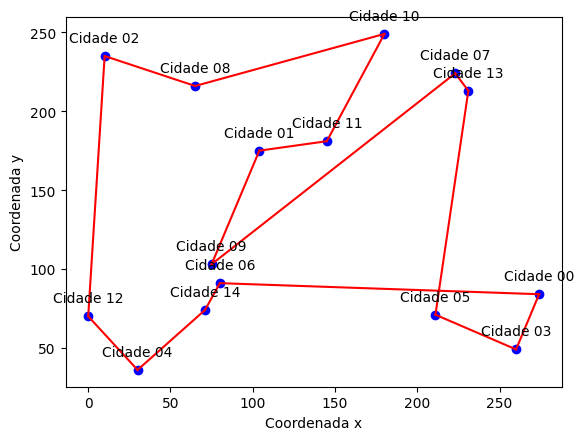

In [876]:
fitness = funcao_objetivo_pop_caixeiro(hall_da_fama, CIDADES)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)

-----

### Conclusão:

Portanto, foi possível construir um algoritmo genético que cria candidatos para o problema do caixeiro que sempre começam na 'cidade 00' depois percorrem as cidades ímpares e por último vão até as cidades pares. E a função de cruzamento e mutação preservam essas estruturas de candidatos. A função objetivo é a mesma daquela criada em aula e apenas calcula a distância euclidiana entre duas cidades. Através dessas estruturas foi possível, portanto, alcançar um melhor indivíduo. Obviamente que pela natureza dos algoritmos genéticos não se sabe se foi obtido a melhor respostas para o problema, e isso somente seria possível com uma busca exaustiva. 